# План работы с изображениями

1) посмотреть все папки внутри папки датасета

2) преобразовать датасет в формат pkl структуры joblib

3) проанализировать переделанный датасет

4) посмотреть на изображения каждого животного

5) обозначить x и y

6) разделить данные на тестовые и тренировочные

7) проверить графически, насколько хорошо были разделены данные

8) написать класс преобразования изображения в серый формат

8) написать класс преобразования серого изображения в частотный вид

9) преобразовать все изображения в частотный вид (как тренировочные, так и тестовые)

10) обучить модель

11) оценить работу модели + построить матрицу запутанности

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage

# `Подготовка данных`

In [6]:
# data_path = os.path.abspath('DataBases/images')
data_path = 'c:\\ML\\DataBases\\img_animals'  # путь к датасету
os.listdir(data_path)  # все папки, хранящиеся внутри датасета

['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PandaHead',
 'PigeonHead',
 'PigHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

In [7]:
import joblib
from skimage.transform import resize
from skimage.io import imread

In [8]:
def resize_all(scr, pklname, include, width=150, heigth=None):
    """ФУНКЦИЯ ПРЕОБРАЗОВАНИЯ ДАТАСЕТА \n
    scr - путь к датасету \n
    pklname - название будущего файла с данными \n
    include - список папок, в которые можно заходить \n
    width, heigth - размеры картинок, к которым надо привести"""
    
    heigth = heigth if heigth else width  # если высота изображения не была указана, то картинка будет квадратной
    data = dict()
    data['description'] = 'resized ({0}x{1}) animal images in rgb'.format(int(width), int(heigth))
    data['label'] = []  # храним все группы зверей (классы для обучения)
    data['filename'] = []  # храним все отдельные названия картинок зверей
    data['data'] = []  # храним все картинки в преобразованном в массив формате

    pklname = f'{pklname}_{width}x{heigth}px.pkl'

    for subdir in os.listdir(scr):  # проходимся по всем файлам датасета
        if subdir in include:  # если в эту папку вообще можно заходить
            current_path = os.path.join(scr, subdir)  # путь к каждой папке внутри основной
            for file in os.listdir(current_path):  # проходимя по всем изображениям внутри папки
                if file [-3:] in ('jpg', 'png'):  # чтобы не зайти куда не надо было (проверяет формат файла)
                    im = imread(os.path.join(current_path, file))  # считываем изображение
                    im = resize(im, (width, heigth))  # измняем размеры изображения
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
            print(subdir)
    joblib.dump(data, pklname)  # сохраняем сам pkl файл


In [9]:
base_name = 'animal_f'
include = ['BearHead',
 'CatHead',
 'ChickenHead',
 'CowHead',
 'DeerHead',
 'DuckHead',
 'EagleHead',
 'ElephantHead',
 'HumanHead',
 'LionHead',
 'MonkeyHead',
 'MouseHead',
 'Natural',
 'PandaHead',
 'PigeonHead',
 'PigHead',
 'RabbitHead',
 'SheepHead',
 'TigerHead',
 'WolfHead']

width = 100
resize_all(scr=data_path, pklname=base_name, width=width, include=include)

BearHead
CatHead
ChickenHead
CowHead
DeerHead
DuckHead
EagleHead
ElephantHead
HumanHead
LionHead
MonkeyHead
MouseHead
Natural
PandaHead
PigeonHead
PigHead
RabbitHead
SheepHead
TigerHead
WolfHead


In [10]:
from collections import Counter

data = joblib.load(f'{base_name}_{width}x{width}px.pkl')  # загружаем созданный датасет

print(f'number of samples: {len(data["data"])}')
print(f'keys: {list(data.keys())}')
print(f'description: {data["description"]}')
print(f'image shape: {data["data"][0].shape}')
print(f'labels: {np.unique(data["label"])}')

Counter(data['label'])  # количество изображений каждого животного

number of samples: 1994
keys: ['description', 'label', 'filename', 'data']
description: resized (100x100) animal images in rgb
image shape: (100, 100, 3)
labels: ['Bear' 'Cat' 'Chicken' 'Cow' 'Deer' 'Duck' 'Eagle' 'Elephant' 'Human'
 'Lion' 'Monkey' 'Mouse' 'Nat' 'Panda' 'Pig' 'Pigeon' 'Rabbit' 'Sheep'
 'Tiger' 'Wolf']


Counter({'Cat': 159,
         'Panda': 117,
         'Tiger': 112,
         'Duck': 102,
         'Bear': 101,
         'Cow': 101,
         'Deer': 101,
         'Pig': 101,
         'Chicken': 100,
         'Elephant': 100,
         'Human': 100,
         'Monkey': 100,
         'Mouse': 100,
         'Rabbit': 100,
         'Sheep': 100,
         'Wolf': 100,
         'Pigeon': 98,
         'Eagle': 97,
         'Lion': 97,
         'Nat': 8})

In [11]:
labels = np.unique(data['label'])
labels = [list(labels[:5]), list(labels[5:10]), list(labels[10:15]), list(labels[15:20])]
labels

[['Bear', 'Cat', 'Chicken', 'Cow', 'Deer'],
 ['Duck', 'Eagle', 'Elephant', 'Human', 'Lion'],
 ['Monkey', 'Mouse', 'Nat', 'Panda', 'Pig'],
 ['Pigeon', 'Rabbit', 'Sheep', 'Tiger', 'Wolf']]

In [12]:
x = data['data']
y = np.array(data['label'])

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    shuffle=True, random_state=42)

## Проверка качества разделения данных

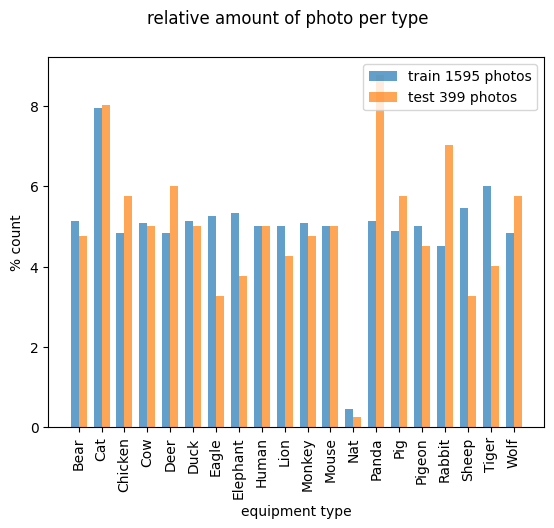

In [16]:
def plot_bar(y, loc='left', relative=True):
    """качество разделения данных"""
    
    width = 0.35  # ширина столбцов                                                                                
    if loc == 'left':  # положение слолбцов относительно друг друга
        n=-0.5
    elif loc == 'right':
        n=0.5

    unique, counts = np.unique(y, return_counts=True)  # counts - количество уникальных значений
    sorted_index = np.argsort(unique)   # возвращает массив индексов, 
    #                       отсортированных в порядке возрастания значений в unique
    unique = unique[sorted_index]  # вернет отсортированный массив уникальных значений

    if relative:
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        counts = counts[sorted_index]
        ylabel_text = 'count'

    xtemp = np.arange(len(unique))

    plt.bar(xtemp+n*width, counts, align='center', alpha=0.7, width=width)
    plt.xticks(xtemp, unique, rotation=90)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)

plt.suptitle('relative amount of photo per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend(['train {0} photos'.format(len(y_train)),
           'test {0} photos'.format(len(y_test))])

## Обработка

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage.feature import hog  # частотное разложение
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """преобразование изображения в серый формат"""
 
    def __init__(self):  # нужно, чтобы запустить init во вспомогательных классах, от которых идет наследование
        pass
 
    def fit(self, X, y=None):  # возвращает ссылку на себя для корректной работы
        return self
 
    def transform(self, X, y=None):  # производит преобразование каждого изображения
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """преобразование серого избражнния в частотный вид"""
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        # orientations - количество направлений, по которым могут стоиться вектора для преобразования
        # pixels_per_cell - размеры блоков, на которые будет делиться изображение для преобразования
        # cells_per_block - размеры блоков, по которым будет рассматриваться кусочек изображения pixels_per_cell
        # block_norm - технология, которая используется для преобразования

        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):  # нужен для корректной работы
        return self
 
    def transform(self, X, y=None):  # производит преобразование
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)  # частотное преобразование
 
        try: # будет работать паралленьно, и если возникнет ошибка, то продолжит последовательно
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell = (10, 10),
    cells_per_block=(2, 2),
    orientations=9,
    block_norm='L2-Hys'
)
scalify = StandardScaler()

In [22]:
x_train_gray = grayify.fit_transform(x_train)
x_train_hog = hogify.fit_transform(x_train_gray)
x_train_prepared = scalify.fit_transform(x_train_hog)

print(x_train_prepared.shape)

(1595, 2916)


In [23]:
x_test_grey = grayify.transform(x_test)
x_test_hog = hogify.transform(x_test_grey)
x_test_prepared = scalify.transform(x_test_hog)

print(x_test_prepared.shape)

(399, 100, 100)
(399, 2916)


## Визуализация работы преобразователей изображений

In [16]:
from skimage.io import imshow

In [17]:
labels = np.unique(data['label'])
print(len(labels))

x_gray = grayify.fit_transform(x)
print(x_gray.shape)

# from skimage.transform import rescale
# x_gray_rescaled = rescale(x_gray, 1/3, mode='reflect')

x_hog_lst = []
for i, el in enumerate(x_gray):
    x_hog, x_hog_img = hog(
        x_gray[i], pixels_per_cell=(14,14), 
        cells_per_block=(2, 2), 
        orientations=9, 
        visualize=True, 
        block_norm='L2-Hys')
    x_hog_lst.append(x_hog_img)

20
(1994, 100, 100)


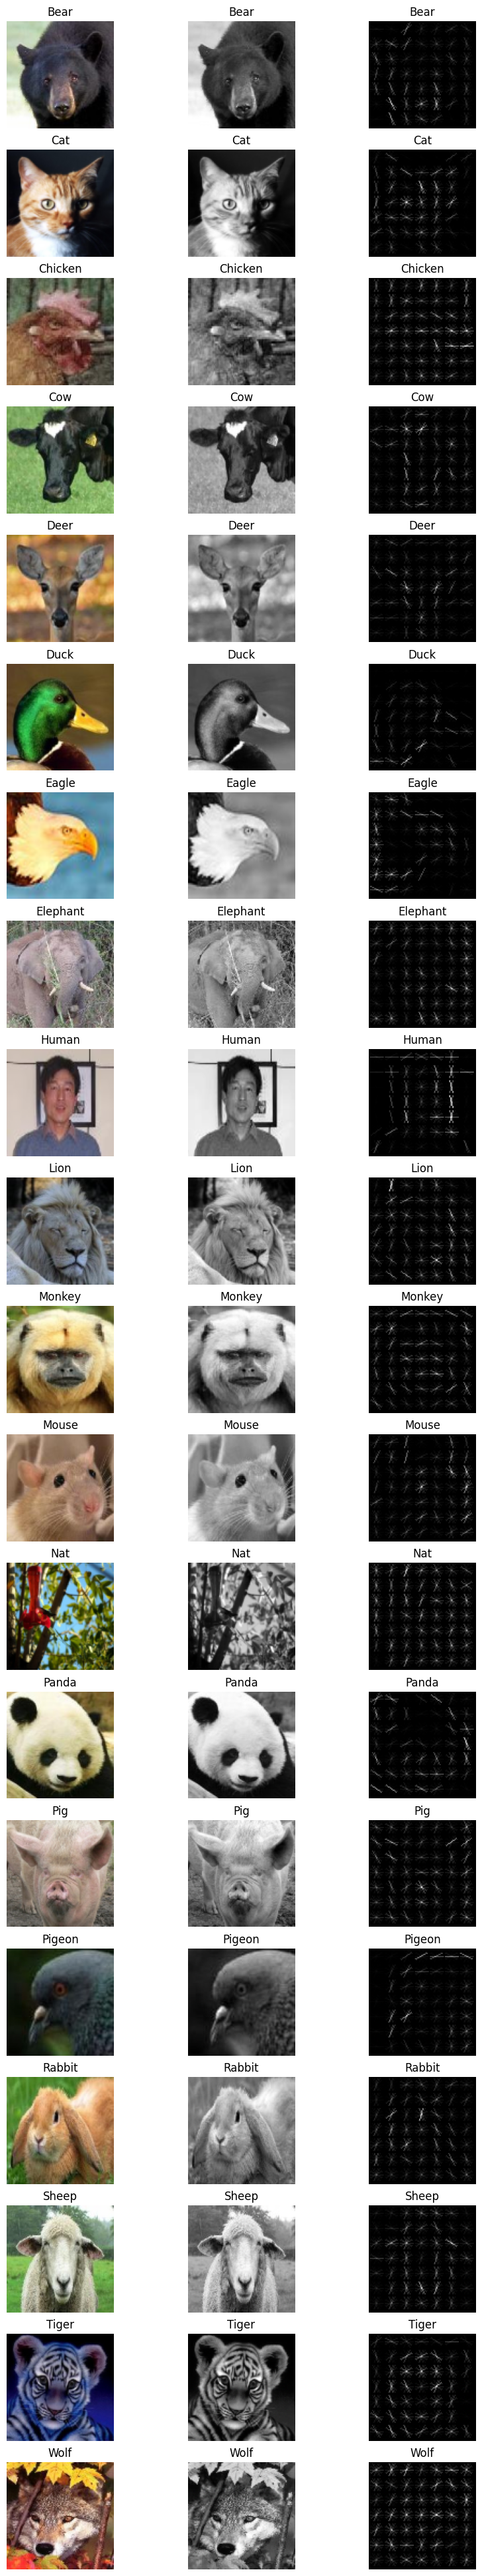

In [18]:
fig, axes = plt.subplots(20, 3)

fig.set_size_inches(15, 4)
fig.set_figheight(50)
fig.set_figwidth(10)

k = 1  # будет отвечать за то, какое изображение нужно отобразить

for ax, label in zip(axes, labels):
    for ax1 in ax:
        
        idx = data['label'].index(label)

        if k == 1: ax1.imshow(x[idx], cmap='gray')
        if k == 2: ax1.imshow(x_gray[idx], cmap='gray')
        if k == 3: ax1.imshow(x_hog_lst[idx], cmap='gray')
        
        k += 1
        if k > 3: k = 1

        ax1.axis('off')
        ax1.set_title(label)

## Обучение

In [19]:
from sklearn.linear_model import SGDClassifier  # градиентный спуск

In [20]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
#  tol - относительная погрешность
sgd_clf.fit(x_train_prepared, y_train)

SGDClassifier(random_state=42)

## Тестирование

In [21]:
y_pred = sgd_clf.predict(x_test_prepared)
print(np.array(y_pred == y_test))
print('percentage correct: ', str(100*np.sum(y_pred==y_test)/len(y_test)))

[ True  True False  True  True False  True  True  True  True  True  True
  True  True False False  True  True  True  True False  True  True  True
  True False  True  True False  True  True False  True  True  True False
  True  True False  True False  True False  True  True False  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True False False
  True  True False  True  True  True  True False  True False False  True
  True  True False False False  True  True  True False  True  True False
  True  True  True False  True  True  True False  True  True False False
  True  True  True  True  True  True  True False  True  True False False
  True False  True  True  True False False  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False False  True  True  True  T

## Матрица запутанности

In [22]:
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay

In [23]:
df_x = pd.DataFrame(x_test_prepared)
df_x

,0,1,2,3,4,5,6,7,8,9,...,2906,2907,2908,2909,2910,2911,2912,2913,2914,2915
0,-1.158859,0.395468,1.669155,0.340380,1.839170,0.073928,0.494606,-0.976978,-1.030457,-1.372459,...,-0.135128,0.127600,-1.024734,-1.053444,-0.828838,-1.234809,-0.765068,-0.560615,1.540707,1.067717
1,-0.676293,-0.683332,-0.613838,-0.215518,-0.488543,-0.059275,-0.552836,-0.579202,-0.600730,-1.019591,...,-0.494628,0.445703,-0.694788,0.838897,0.062255,0.643831,0.450276,0.258317,0.409317,-0.364168
2,-1.207181,-0.851141,-0.887556,-0.493674,0.084941,-0.697159,-0.885091,-0.915592,-0.940411,-1.417212,...,-1.031532,-0.804992,-0.298854,-0.667888,-0.323016,-0.465891,-0.306306,-0.494456,-0.607445,-1.028033
3,-0.681149,-0.653427,-0.766625,-0.847897,1.001411,-0.072428,-0.221281,-0.054731,-0.885403,-0.995604,...,-0.848062,0.592801,1.381704,1.806270,0.806404,0.733474,0.270318,-0.773474,-0.169826,-0.526287
4,-1.035606,-0.624386,0.392090,-0.322430,-0.956360,-1.048875,-1.001202,-0.882548,-0.959265,-1.454254,...,0.445868,0.106669,0.048022,-0.057813,1.439893,0.079881,-0.393290,-0.348854,-0.227157,0.205118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.794806,1.271753,0.923799,-0.330362,0.587088,0.761288,0.914970,0.827575,1.521624,0.642285,...,-0.651579,0.863634,-0.269621,-0.884460,-1.110634,-1.092998,-0.164115,3.097057,2.858155,0.686778
395,0.451500,-0.464942,0.127499,1.105245,-1.138498,-0.585328,0.080748,1.024590,-0.191731,0.025875,...,-0.101322,0.858271,0.945067,1.702164,-0.134712,-0.834700,-0.486066,-0.950836,-0.191986,-0.506503
396,0.562188,-0.342871,1.059819,-0.062407,0.306049,1.067127,0.264961,1.233521,0.896593,0.531880,...,0.064107,0.628470,0.336060,-0.802345,1.113986,0.339069,0.112888,0.678256,-0.481570,0.341297
397,-0.444311,0.876169,1.095922,-0.933295,0.498314,-0.208363,0.018579,0.426721,0.574558,-0.397190,...,1.163862,-1.379302,-0.562320,-0.227337,-0.265529,-0.731147,0.939473,0.348655,1.545019,-0.340825


In [24]:
df_y = pd.DataFrame(y_test)
df_y

,0
0,Human
1,Rabbit
2,Cow
3,Rabbit
4,Elephant
...,...
394,Human
395,Chicken
396,Duck
397,Lion


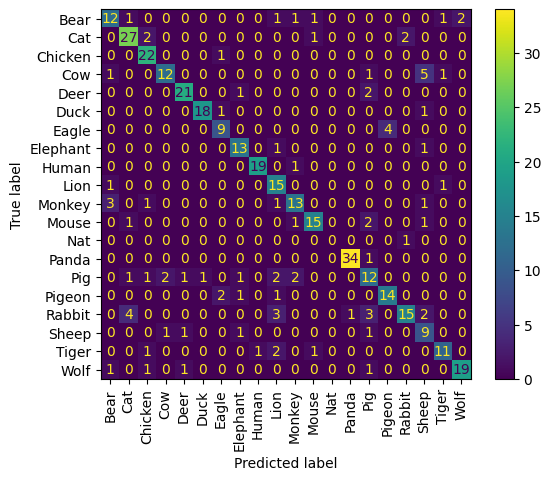

In [25]:
ConfusionMatrixDisplay.from_estimator(sgd_clf, df_x, df_y, xticks_rotation=90)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn import svm
# Pipline - удобный способ объединения нескольких этапов обработки данных в ML

HOG_pipeline = Pipeline([
    ('grayify', RGB2GrayTransformer()),  # первый шаг
    ('hogify', HogTransformer(  # второй шаг и тд
        pixels_per_cell=(10, 10), 
        cells_per_block=(2, 2), 
        orientations=9, 
        block_norm='L2-Hys')
    ),
    ('scalify', StandardScaler()),
    ('classify', SGDClassifier(random_state=42, max_iter=1000, tol=1e-3))
])
 
clf = HOG_pipeline.fit(x_train, y_train)
print('Percentage correct: ', 100*np.sum(clf.predict(x_test) == y_test)/len(y_test))

Percentage correct:  77.69423558897243


## Улучшение качества модели

In [27]:
 # поиск оптимальных параметров с помощью поиска по сетке векторов
param_grid = [
    # пытаемся улучшить ежика
    {
        # параметры для SGD
        'hogify__orientations': [8, 9],
        'hogify__cells_per_block': [(2, 2), (3, 3)],
        'hogify__pixels_per_cell': [(8, 8), (10, 10), (12, 12)]
    },
    # сравниваем SGD с svm, так как картинка теперь векторизована
    {
        # параметры для svm
        'hogify__orientations': [8],
         'hogify__cells_per_block': [(3, 3)],
         'hogify__pixels_per_cell': [(8, 8)],
         'classify': [
             SGDClassifier(random_state=42, max_iter=1000, tol=1e-3),
             svm.SVC(kernel='linear')
         ]
    }
]

In [28]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(HOG_pipeline,  # линия оптимизации
                           param_grid,  # параметры сетки
                           cv=3,  # кроссвалидация (метод оценки одного этапа обучения)
                           n_jobs=-1,  # количество ядер для подсчетов (не работает не винде)
                           scoring='accuracy',  # оценка обучения
                           verbose=1,  # трассировка (выводит информацию в процессе обучения)
                           return_train_score=True)  # 


 
grid_res = grid_search.fit(x_train, y_train)
grid_res

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('grayify', RGB2GrayTransformer()),
                                       ('hogify',
                                        HogTransformer(cells_per_block=(2, 2),
                                                       pixels_per_cell=(10,
                                                                        10))),
                                       ('scalify', StandardScaler()),
                                       ('classify',
                                        SGDClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'hogify__cells_per_block': [(2, 2), (3, 3)],
                          'hogify__orientations': [8, 9],
                          'hogify__pixels_per_cell': [(8, 8), (10, 10),
                                                      (12, 12)]},
                         {'classify': [SGDClassifier(random_state=42),
                                       SVC(kernel='linear')],
                          'hogify__cells_per_block': [(3, 3)],
                          'hogify__orientations': [8],
                          'hogify__pixels_per_cell': [(8, 8)]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [29]:
y_pred = grid_res.predict(x_test)

print(f'percentage correct: {100*np.sum(y_pred==y_test)/len(y_test)}')

percentage correct: 81.45363408521304


In [49]:
joblib.dump(grid_res, 'animal_predict_model.pkl')

['animal_predict_model.pkl']

In [50]:
clf = joblib.load('animal_predict_model.pkl')

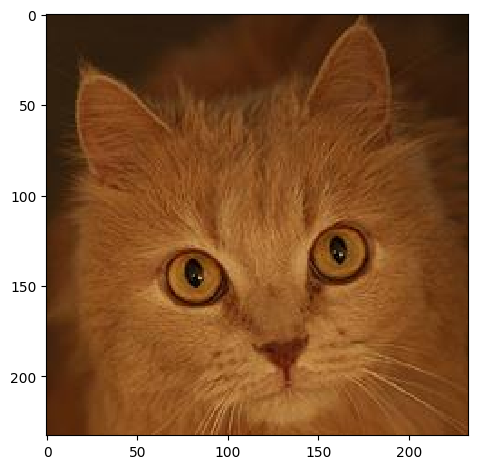

In [46]:
img = imread('cat990a.jpg')
imshow(img)

In [47]:
img = resize(img, (100, 100))

In [48]:
pr = grid_res.predict([img])
pr

array(['Cat'], dtype='<U8')